In [131]:
import requests
from bs4 import BeautifulSoup
import statistics
import re
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np

In [132]:
page = requests.get("https://www.goodreads.com/list/show/6.Best_Books_of_the_20th_Century")
soup = BeautifulSoup(page.content, 'html.parser')

In [133]:
book_variances = {}

def find_stars(tag):
    rating = 0
    for each_star in tag.find_all(class_="staticStar p10"):
        rating +=1
    return rating

def ratings_class_match(name):
    if(name.strip().lower()=="staticStars notranslate"):
        return True
    else:
        return False

def get_book_data(url):
    print("currently parsing url" + str(url))
    page = requests.get(url)
    soup = BeautifulSoup(page.content, 'html.parser')
    book_ratings = []
    for each_tag in soup.find_all(class_="staticStars notranslate"):
        book_ratings.append(find_stars(each_tag))
    return book_ratings

for each_tag in soup.find_all(class_="js-tooltipTrigger tooltipTrigger"):
    url_ext = each_tag.a.attrs['href']
    try:
        book_name = url_ext.split(".")[1]
    except:
        book_name = url_ext.replace("https://www.goodreads.com/book/show/", "")
    variance_of_book = get_book_data("https://www.goodreads.com" + str(url_ext))
    book_variances.update({book_name: variance_of_book})

currently parsing urlhttps://www.goodreads.com/book/show/2657.To_Kill_a_Mockingbird
currently parsing urlhttps://www.goodreads.com/book/show/40961427-1984
currently parsing urlhttps://www.goodreads.com/book/show/3.Harry_Potter_and_the_Sorcerer_s_Stone
currently parsing urlhttps://www.goodreads.com/book/show/4671.The_Great_Gatsby
currently parsing urlhttps://www.goodreads.com/book/show/170448.Animal_Farm
currently parsing urlhttps://www.goodreads.com/book/show/5907.The_Hobbit_or_There_and_Back_Again
currently parsing urlhttps://www.goodreads.com/book/show/48855.The_Diary_of_a_Young_Girl
currently parsing urlhttps://www.goodreads.com/book/show/157993.The_Little_Prince
currently parsing urlhttps://www.goodreads.com/book/show/13079982-fahrenheit-451
currently parsing urlhttps://www.goodreads.com/book/show/5107.The_Catcher_in_the_Rye
currently parsing urlhttps://www.goodreads.com/book/show/100915.The_Lion_the_Witch_and_the_Wardrobe
currently parsing urlhttps://www.goodreads.com/book/show/18

currently parsing urlhttps://www.goodreads.com/book/show/99107.Winnie_the_Pooh


In [72]:
copy_of_dict = book_variances

In [73]:
book_variances

{'To_Kill_a_Mockingbird': [5,
  5,
  5,
  5,
  2,
  5,
  5,
  1,
  4,
  5,
  4,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  1,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  1,
  4,
  5,
  4],
 '/book/show/40961427-1984': [5,
  5,
  5,
  2,
  5,
  5,
  5,
  4,
  5,
  5,
  4,
  5,
  1,
  5,
  5,
  5,
  5,
  3,
  4,
  5,
  4,
  4,
  4,
  5,
  5,
  1,
  5,
  3,
  5],
 'Harry_Potter_and_the_Sorcerer_s_Stone': [5,
  5,
  5,
  5,
  5,
  5,
  5,
  4,
  1,
  5,
  4,
  5,
  5,
  5,
  3,
  5,
  5,
  3,
  5,
  3,
  4,
  4,
  5,
  1,
  5,
  5,
  5],
 'The_Great_Gatsby': [5,
  5,
  5,
  1,
  2,
  5,
  3,
  1,
  5,
  4,
  2,
  5,
  5,
  4,
  3,
  3,
  5,
  5,
  3,
  5,
  4,
  5,
  5,
  5,
  4,
  5,
  5,
  4,
  2,
  5],
 'Animal_Farm': [5,
  5,
  4,
  5,
  5,
  5,
  5,
  5,
  4,
  5,
  5,
  5,
  5,
  2,
  4,
  4,
  5,
  5,
  5,
  5,
  5,
  4,
  4,
  5,
  5,
  4,
  5,
  5,
  5],
 'The_Hobbit_or_There_and_Back_Again': [5,
  5,
  2,
  5,
  5,
  4,
  5,
  5,
  5,
  5,
  5,
  4,
  5,
  5,
  1,
  5,
  5,
  4,
  5,
  5,
  5

If we look at variance and standard deviation, we can then plot those and see which books are more polarized.

In [74]:
book_std = {}
for key, val in book_variances.items():
    if(len(val)>1):
        book_std.update({key: statistics.pstdev(val)})
    #bins = [1,2,3,4,5]
    #plt.hist(val, bins=bins, alpha=1)
    #plt.title(key)
    #plt.show()

In [75]:
#sort this dictionary by values

In [76]:
book_plt = sorted(book_std.items(), key=lambda x: x[1])

In [79]:
books = {}
for book in book_plt:
    books.update({book[0]: book[1]})

[Text(0, 0, 'Lonesome_Dove'),
 Text(0, 0, 'Harry_Potter_and_the_Prisoner_of_Azkaban'),
 Text(0, 0, 'All_Quiet_on_the_Western_Front'),
 Text(0, 0, 'Harry_Potter_and_the_Chamber_of_Secrets'),
 Text(0, 0, 'Charlotte_s_Web'),
 Text(0, 0, 'Slaughterhouse_Five'),
 Text(0, 0, 'Anne_of_Green_Gables'),
 Text(0, 0, 'Waiting_for_Godot'),
 Text(0, 0, 'Their_Eyes_Were_Watching_God'),
 Text(0, 0, 'Animal_Farm'),
 Text(0, 0, '/book/show/36576608-flowers-for-algernon'),
 Text(0, 0, 'Charlie_and_the_Chocolate_Factory'),
 Text(0, 0, 'Night'),
 Text(0, 0, 'Green_Eggs_and_Ham'),
 Text(0, 0, 'The_Stand'),
 Text(0, 0, 'The_Complete_Sherlock_Holmes'),
 Text(0, 0, 'In_Cold_Blood'),
 Text(0, 0, 'Of_Mice_and_Men'),
 Text(0, 0, 'The_Things_They_Carried'),
 Text(0, 0, 'Invisible_Man'),
 Text(0, 0, 'Winnie_the_Pooh'),
 Text(0, 0, 'The_Joy_Luck_Club'),
 Text(0, 0, '/book/show/17899948-rebecca'),
 Text(0, 0, 'One_Flew_Over_the_Cuckoo_s_Nest'),
 Text(0, 0, 'A_Clockwork_Orange'),
 Text(0, 0, 'The_Return_of_the_King'),

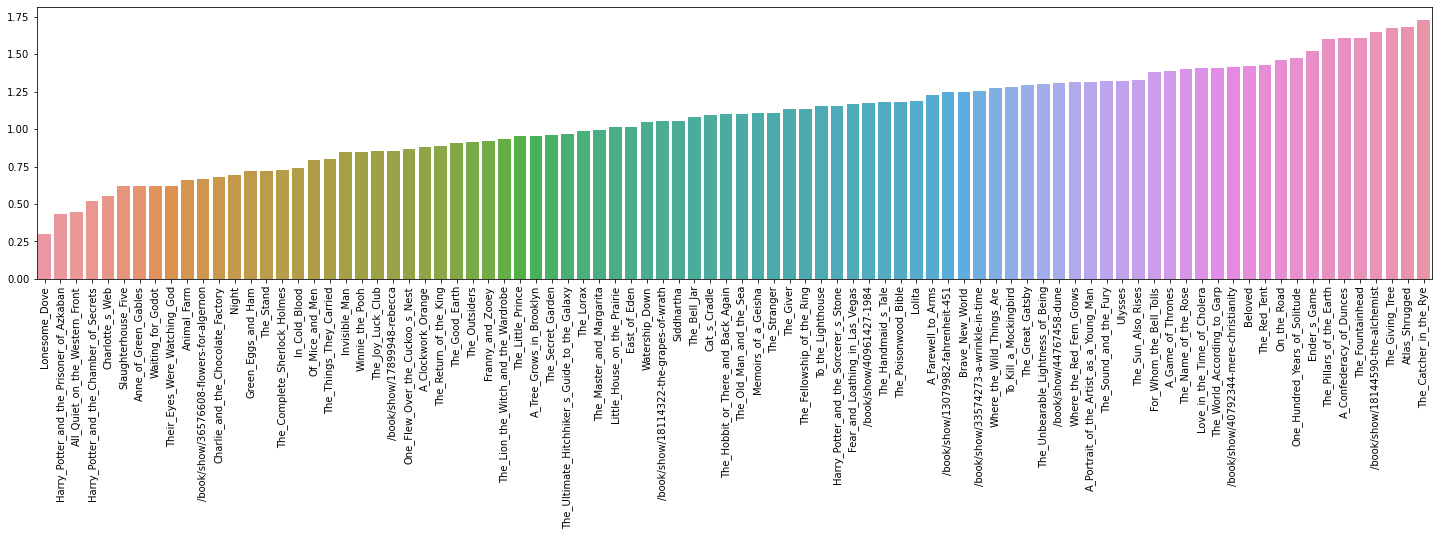

In [130]:
#sns.set_theme(style="whitegrid")
vals = list(books.values())
plt.figure(figsize=(25, 5))
ax = sns.barplot(x=list(books.keys()),y=vals)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)